### module--简单的向前传播

In [3]:
import torch
from torch import nn

class Tudui(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, input):
        output = input + 1
        return output


tudui = Tudui()
x = torch.tensor(5)
output = tudui(x)
print(output)

tensor(6)


------------------------------------------------------------------------------------------------------

### 卷积操作

In [5]:
import torch
import torch.nn.functional as F

input = torch.tensor([[1, 2, 0, 3, 1],
                      [0, 1, 2, 3, 1],
                      [1, 2, 1, 0, 0],
                      [5, 2, 3, 1, 1],
                      [2, 1, 0, 1, 1]])

kernel = torch.tensor([[1, 2, 1],
                       [0, 1, 0],
                       [2, 1, 0]])

input = torch.reshape(input,(1,1,5,5))
kernel = torch.reshape(kernel,(1,1,3,3))
output = F.conv2d(input,kernel,stride=1)
print(output)

output2 = F.conv2d(input,kernel,stride=1,padding=1)
print(output2)

tensor([[[[10, 12, 12],
          [18, 16, 16],
          [13,  9,  3]]]])
tensor([[[[ 1,  3,  4, 10,  8],
          [ 5, 10, 12, 12,  6],
          [ 7, 18, 16, 16,  8],
          [11, 13,  9,  3,  4],
          [14, 13,  9,  7,  4]]]])


- stride=1:表示每次移动一步
- padding=1 :表示input四周填充一行  
**_reshape 方法对张量进行维度重塑，为卷积操作做准备_**
N: 批次大小 (batch_size) ; C: 通道数 (channels) ; H: 高度 (height) ; W: 宽度 (width)
- 将 kernel 重塑为 4 维张量,1个输出通道，1个输入通道，3x3 的卷积核

************************

---------------------------

### 神经网络-卷积层  （nn_conv2d）

In [7]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torch import nn
from torch.nn import Conv2d
from torch.utils.tensorboard import SummaryWriter

In [9]:
dataset = torchvision.datasets.CIFAR10(root="./dataset",  train=False, transform=torchvision.transforms.ToTensor(),download=True)

dataloader = DataLoader(dataset,batch_size=64)

class Tudui(nn.Module):
    def __init__(self):
        super(Tudui,self).__init__()
        self.conv1 = Conv2d(in_channels=3,out_channels=6,kernel_size=3,stride=1,padding=0)

    def forward(self, x):
        x = self.conv1(x)
        return x

tudui = Tudui()
for data in dataloader:
    imgs, targets = data
    output = tudui(imgs)
    print(imgs.shape)

Files already downloaded and verified
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size

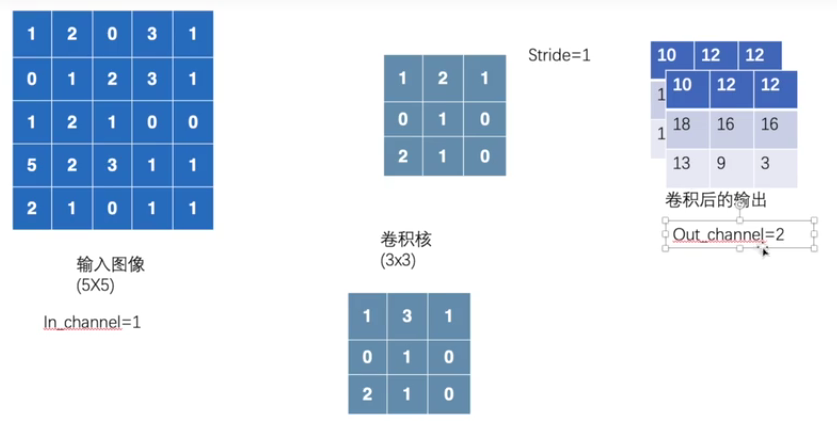

### 最大池化的使用-maxpool

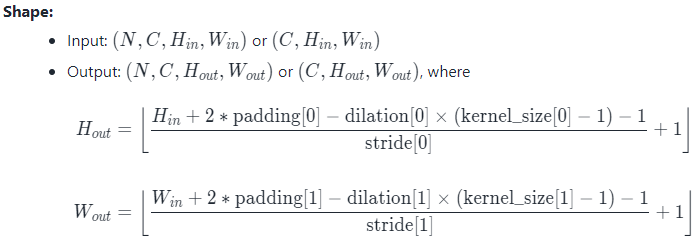

In [2]:
import torch
from torch import nn
import torchvision
from torch.nn import MaxPool2d
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

In [5]:
dataset = torchvision.datasets.CIFAR10(root="./dataset",  train=False, transform=torchvision.transforms.ToTensor(),download=True)

dataloader = DataLoader(dataset,batch_size=64)
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui,self).__init__()
        self.maxpool1 = MaxPool2d(kernel_size=3,ceil_mode=False)

    def forward(self, input):
        output = self.maxpool1(input)
        return output

tudui = Tudui()
writer = SummaryWriter("f")
step = 0
for data in dataloader:
    imgs, targets = data
    writer.add_images = ("input",imgs,step)
    output = tudui(imgs)
    writer.add_images = ("output",output,step)
    step += 1

writer.close()

Files already downloaded and verified
